In [7]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
from IPython.display import display, HTML
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px

def eda(df):
    print("==================================================================")
    print("1. Dataframe Shape: ",df.shape)
    print("==================================================================")
    print("2. Explore the Data: ")
    display(HTML(df.head(5).to_html()))
    print("==================================================================")
    print("3. Information on the Data: ")
    data_info_df                      = pd.DataFrame(df.dtypes, columns=['data type'])
    data_info_df['Duplicated_Values'] = df.duplicated().sum()
    data_info_df['Missing_Values']    = df.isnull().sum().values 
    data_info_df['%Missing']          = df.isnull().sum().values / len(df)* 100
    data_info_df['Unique_Values']     = df.nunique().values
    df_desc                           = df.describe(include='all').transpose()
    data_info_df['Count']             = df_desc['count'].values
    data_info_df['Mean']              = df_desc['mean'].values
    data_info_df['STD']               = df_desc['std'].values
    data_info_df['Min']               = df_desc['min'].values
    data_info_df['Max']               = df_desc['max'].values
    data_info_df                      = data_info_df[['Count','Mean','STD', 'Min', 'Max','Duplicated_Values','Missing_Values',
                                                     '%Missing','Unique_Values']]   
    display(HTML(data_info_df.to_html()))
    print("==================================================================")
    print("4. Correlation Matrix Heatmap - For Numeric Variables:")
    num_cols = df.select_dtypes(include = ['float64','int64']).columns.tolist()
    correlation_matrix = df[num_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.show()
    # print("==================================================================")
    # print("5. Correlation with Target Variable :")
    # t_num = num_cols.append('Attrition')
    # correlation_matrix = df[t_num].corr()
    # target_corr = correlation_matrix['Attrition'].drop('Attrition')
    # target_corr_sorted = target_corr.sort_values(ascending=False)
    # sns.set(font_scale=0.8)
    # sns.set_style("white")
    # sns.set_palette("PuBuGn_d")
    # sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    # plt.show()
    print("==================================================================")
    print("6. Distribution of Nan values")
    print(df.isnull().sum())
    print("==================================================================")
    print("7. Distribution of Numerical Variables")
    for col in num_cols:
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Distribution of {}'.format(col))
        plt.show()
    print("==================================================================")
    print("8. Distribution of Categorical Variables")
    cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
    for col in cat_cols:
        value_counts = df[col].value_counts(normalize=True) * 100
        fig, ax = plt.subplots(figsize=(8, 3))
        #top_n = min(17, len(value_counts))
        #ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
        ax.barh(value_counts.index, value_counts.values)
        ax.set_xlabel('Percentage Distribution')
        ax.set_ylabel(f'{col}')
        plt.tight_layout()
        plt.show()
    print("==================================================================")

1. Dataframe Shape:  (1470, 35)
2. Explore the Data: 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


3. Information on the Data: 


,Count,Mean,STD,Min,Max,Duplicated_Values,Missing_Values,%Missing,Unique_Values
Age,1470.0,36.92381,9.135373,18.0,60.0,0,0,0.0,43
Attrition,1470,NaN,NaN,NaN,NaN,0,0,0.0,2
BusinessTravel,1470,NaN,NaN,NaN,NaN,0,0,0.0,3
DailyRate,1470.0,802.485714,403.5091,102.0,1499.0,0,0,0.0,886
Department,1470,NaN,NaN,NaN,NaN,0,0,0.0,3
DistanceFromHome,1470.0,9.192517,8.106864,1.0,29.0,0,0,0.0,29
Education,1470.0,2.912925,1.024165,1.0,5.0,0,0,0.0,5
EducationField,1470,NaN,NaN,NaN,NaN,0,0,0.0,6
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,0,0,0.0,1
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,2068.0,0,0,0.0,1470


4. Correlation Matrix Heatmap - For Numeric Variables:


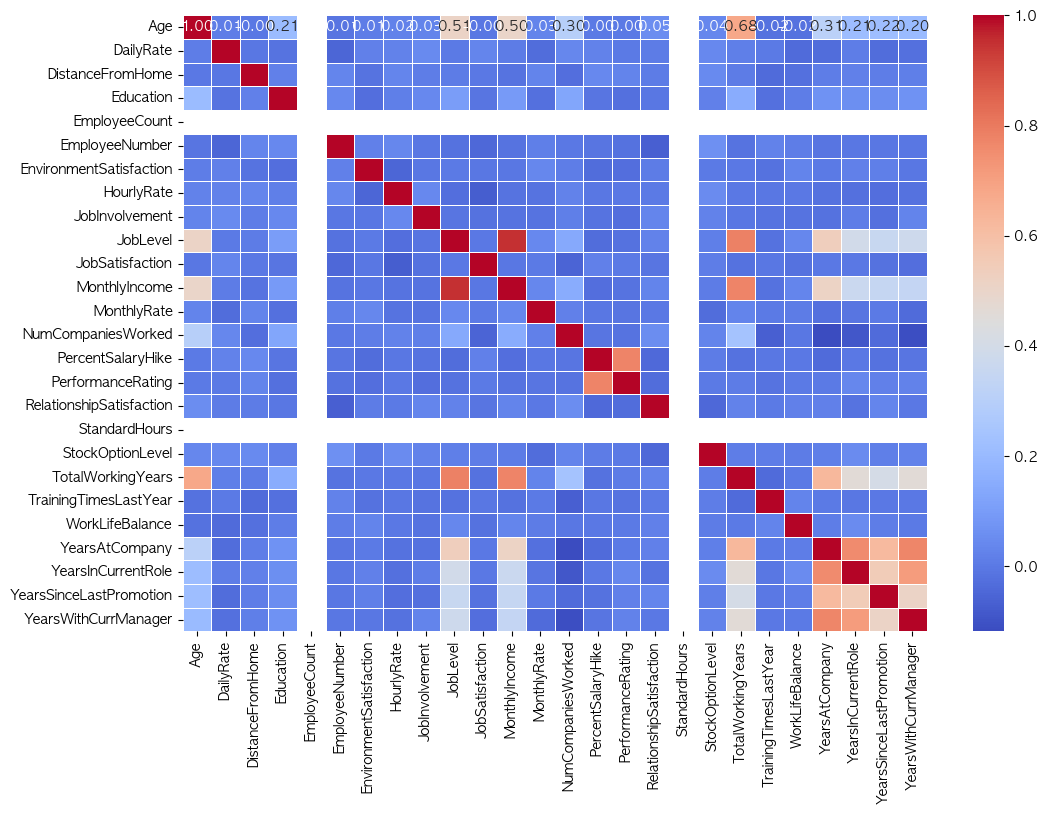

6. Distribution of Nan values
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

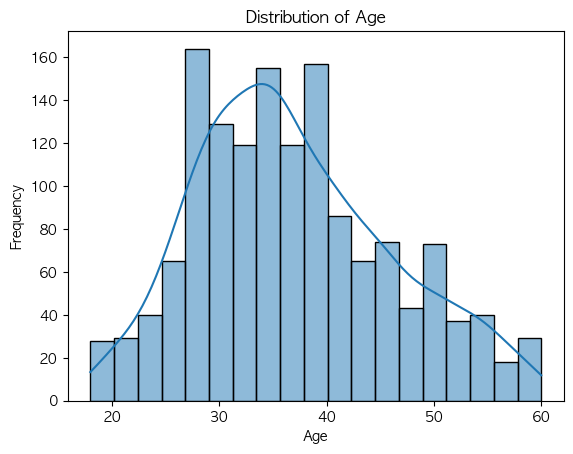

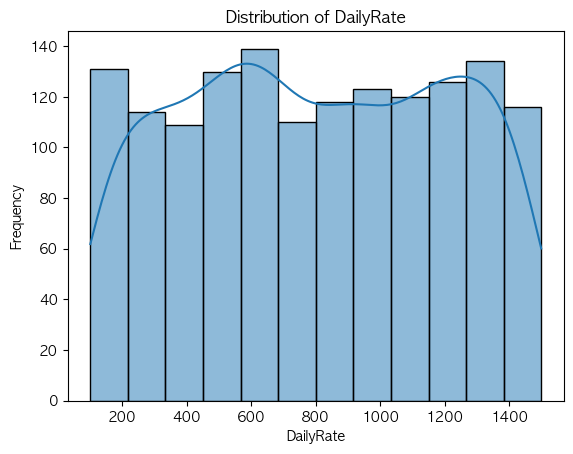

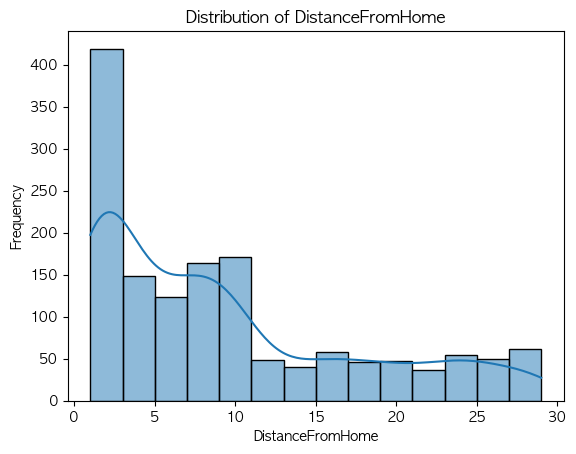

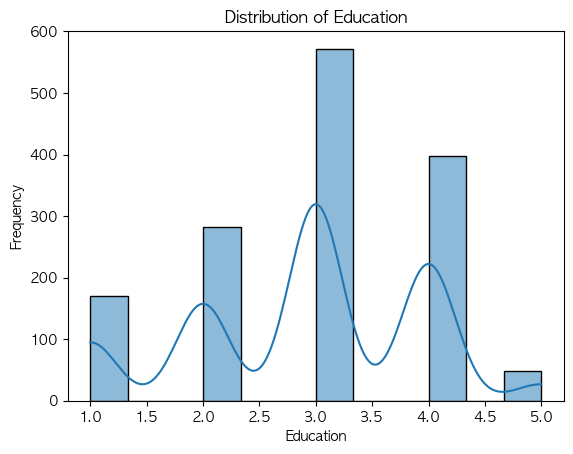

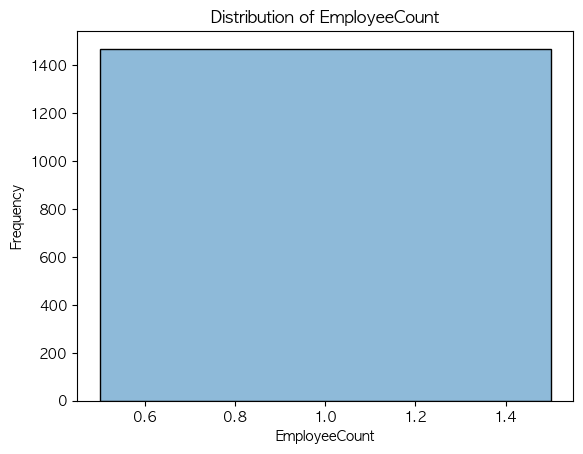

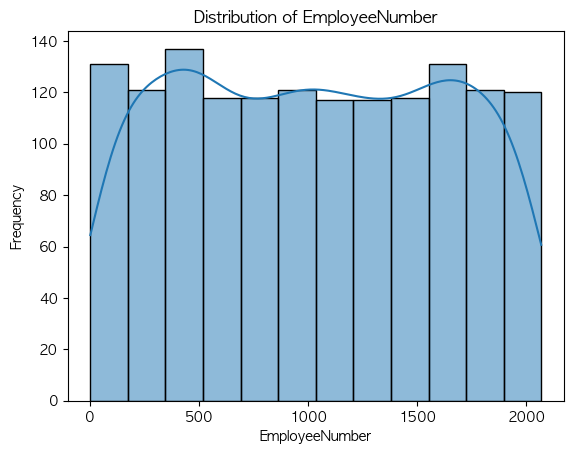

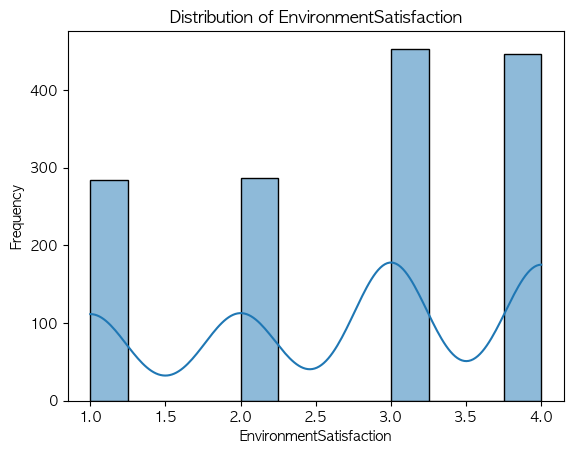

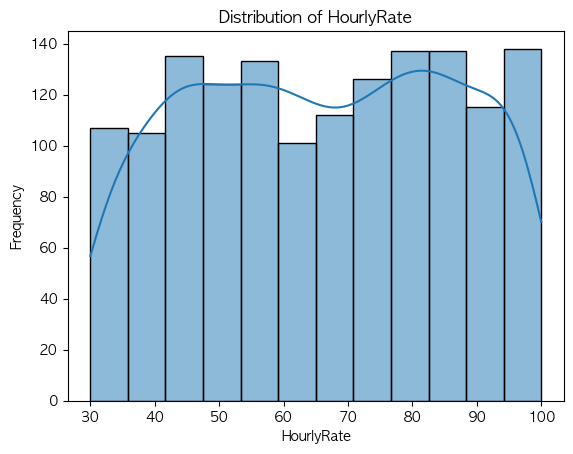

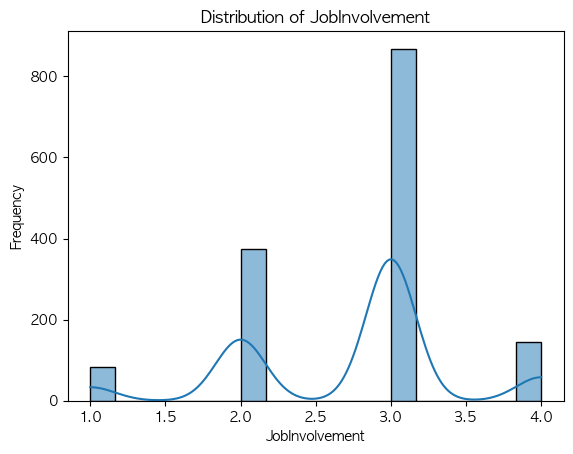

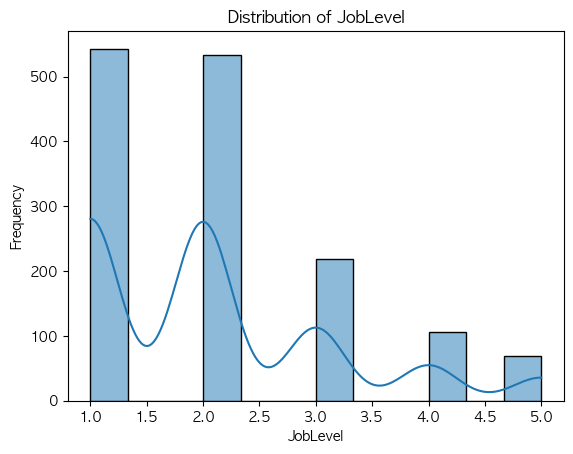

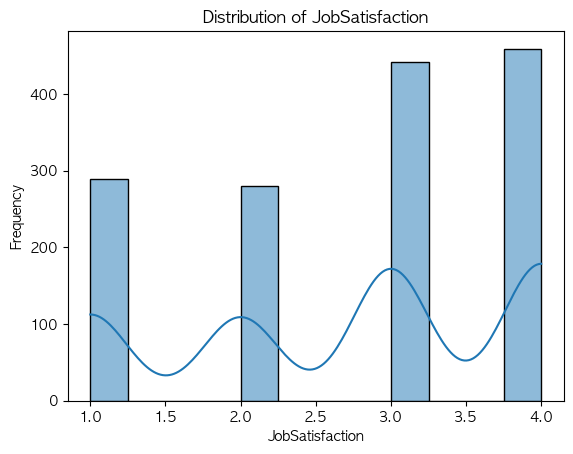

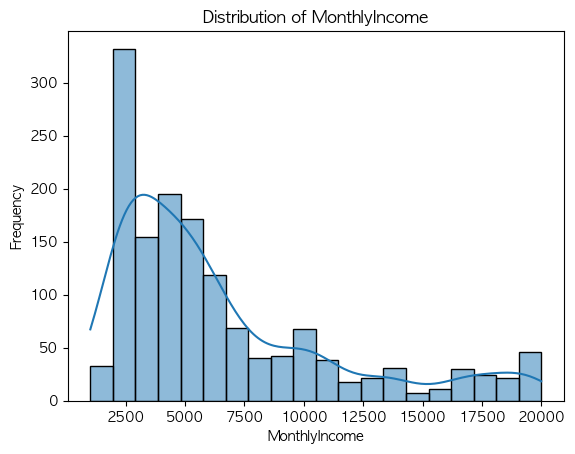

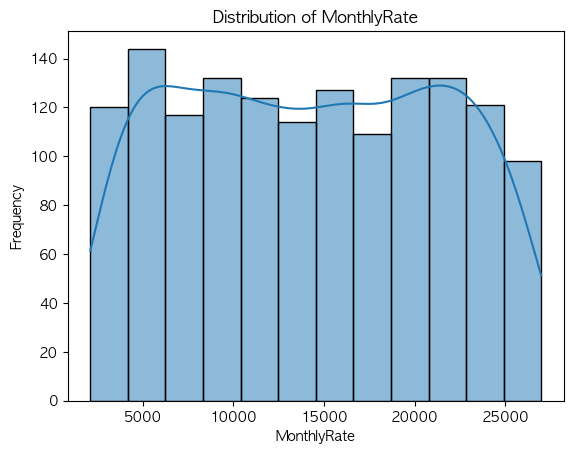

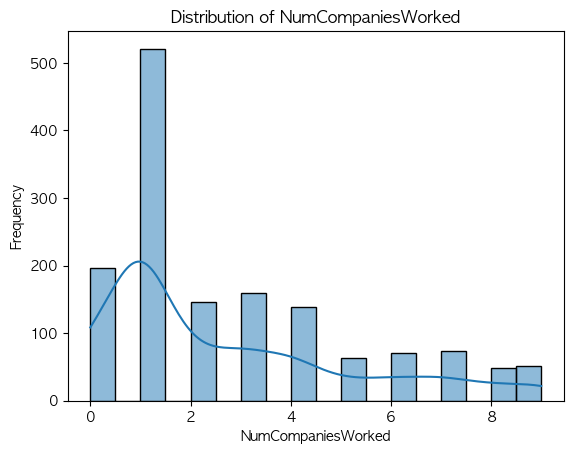

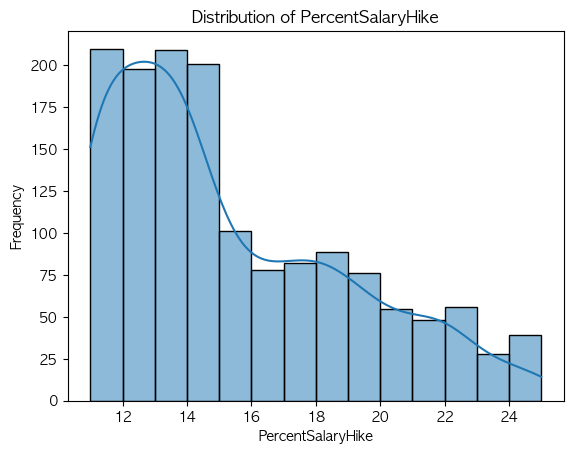

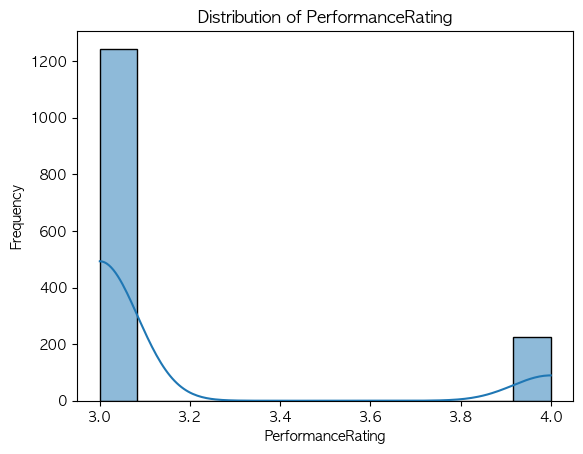

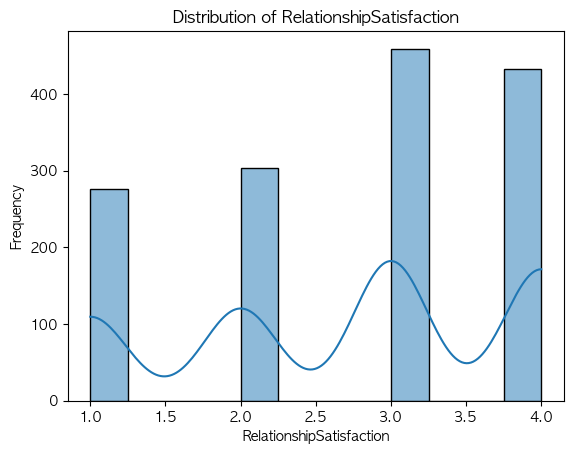

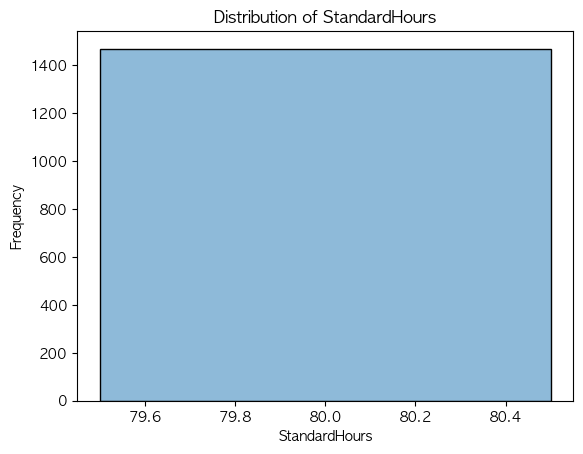

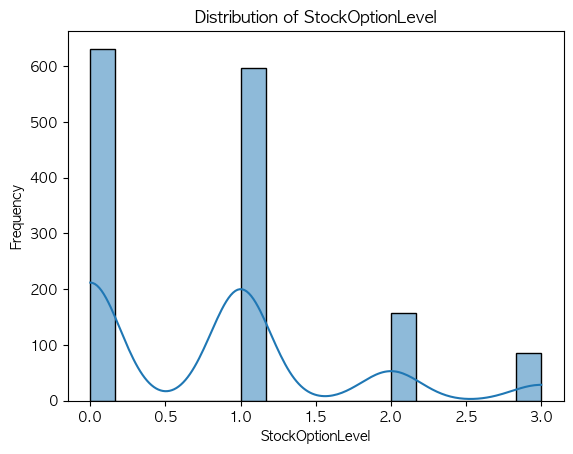

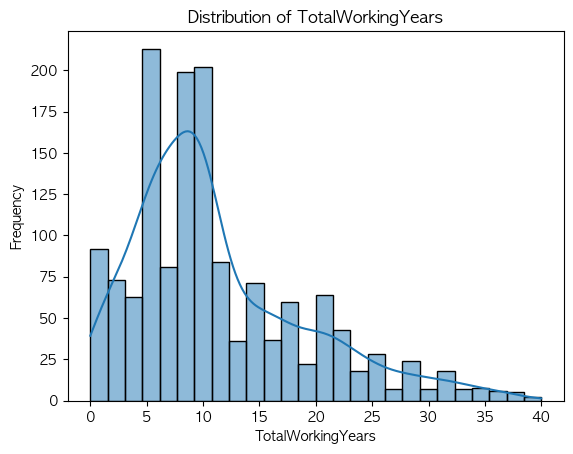

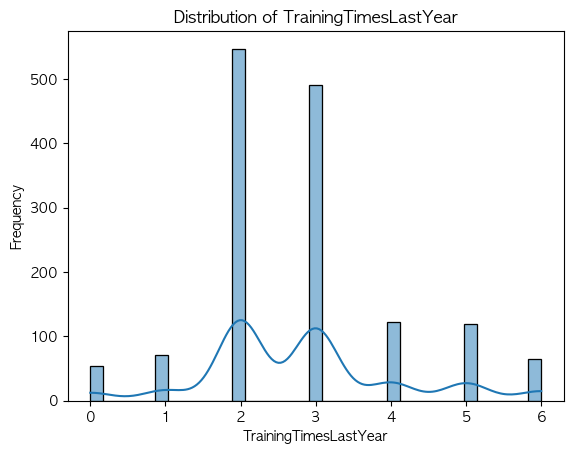

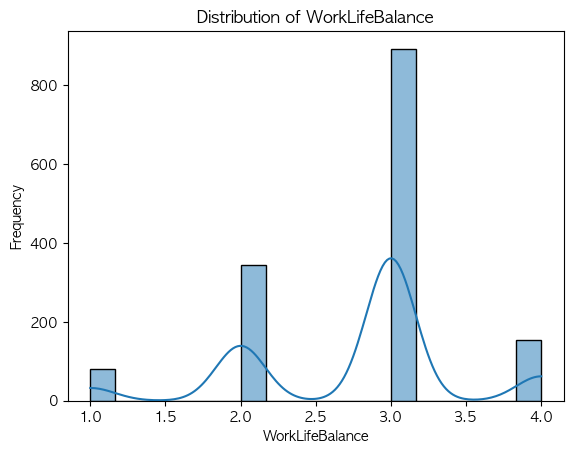

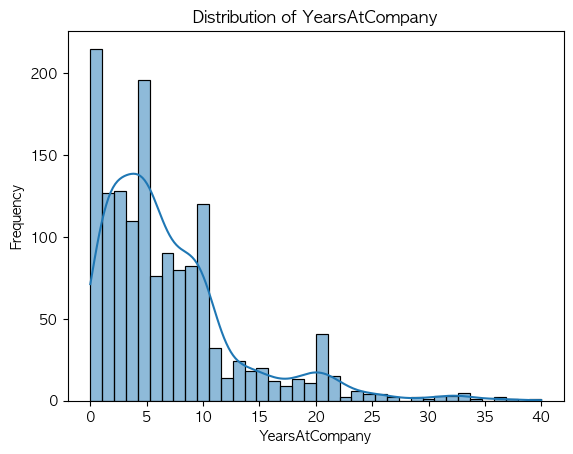

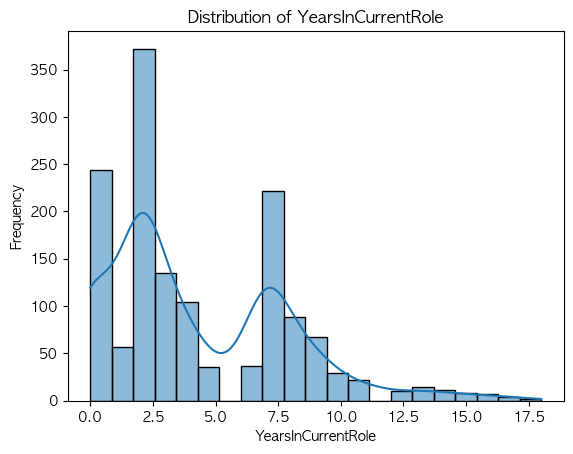

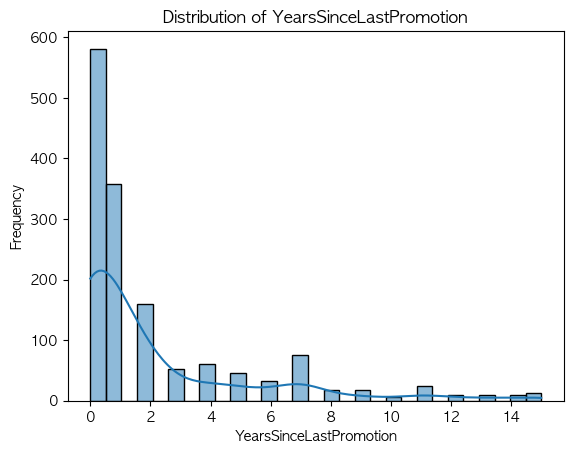

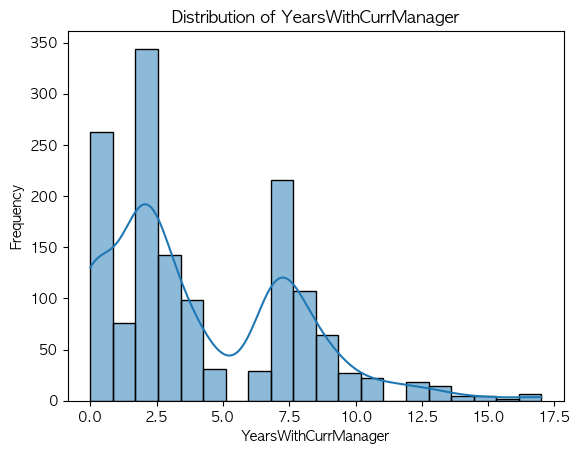

8. Distribution of Categorical Variables


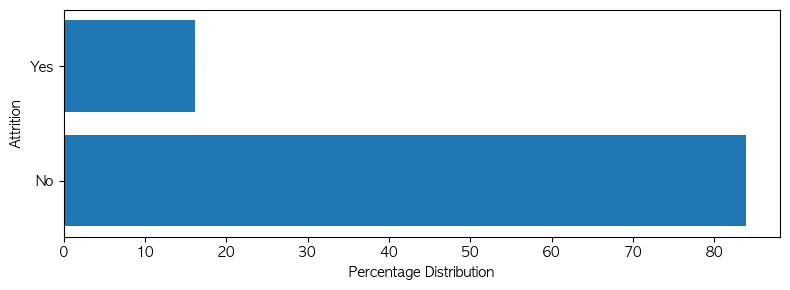

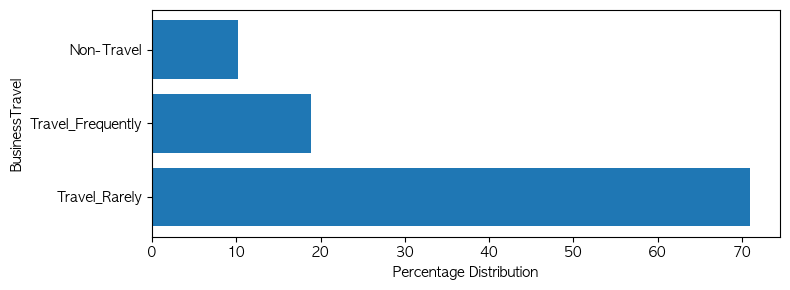

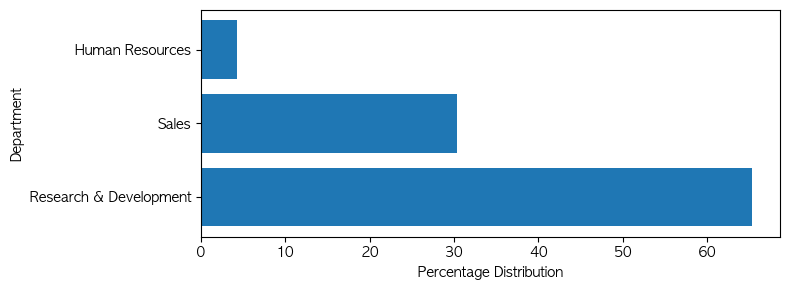

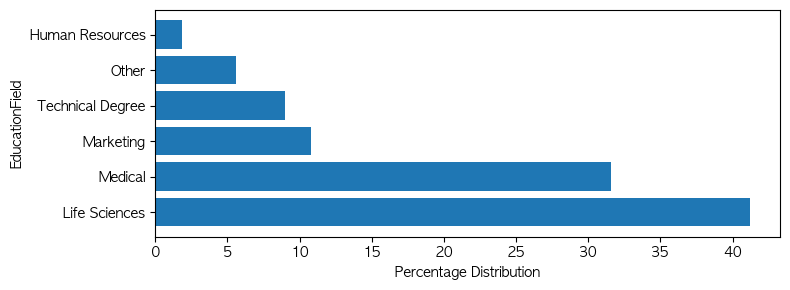

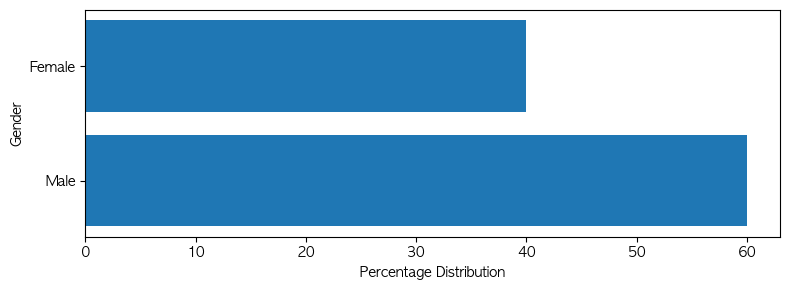

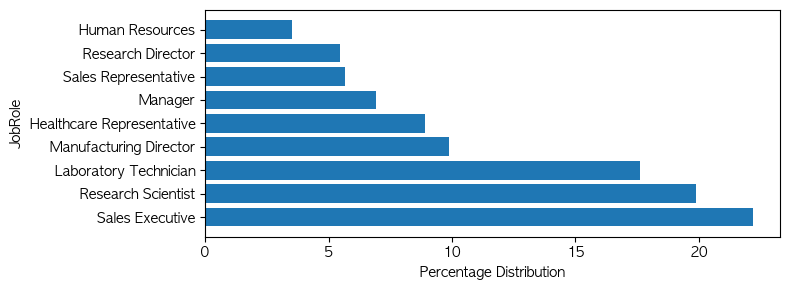

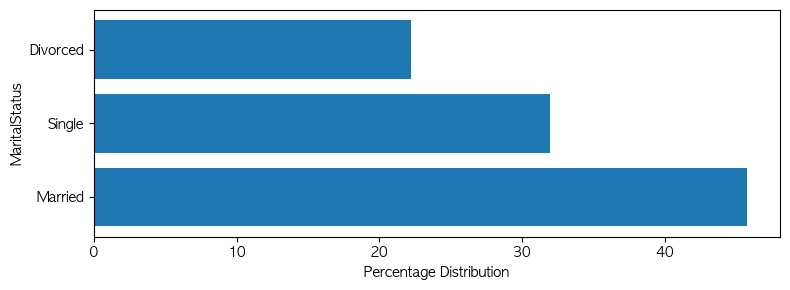

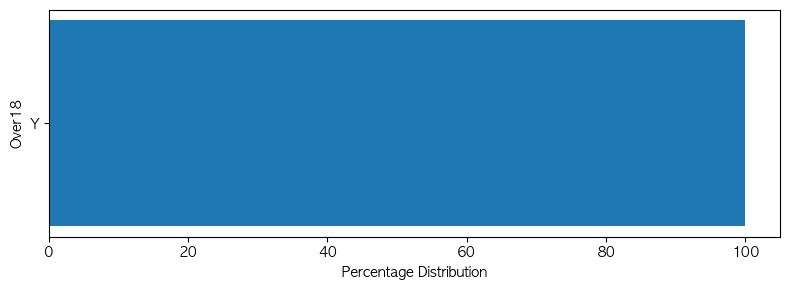

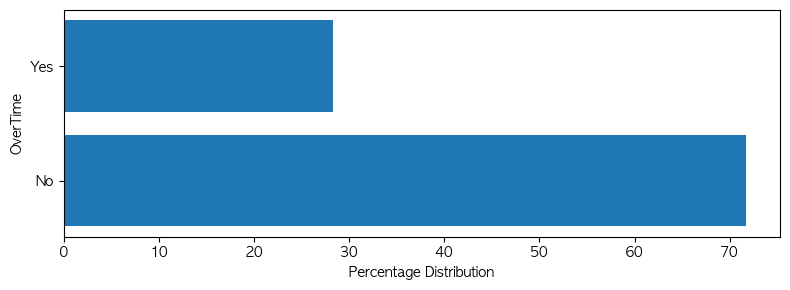

In [8]:
eda(data)

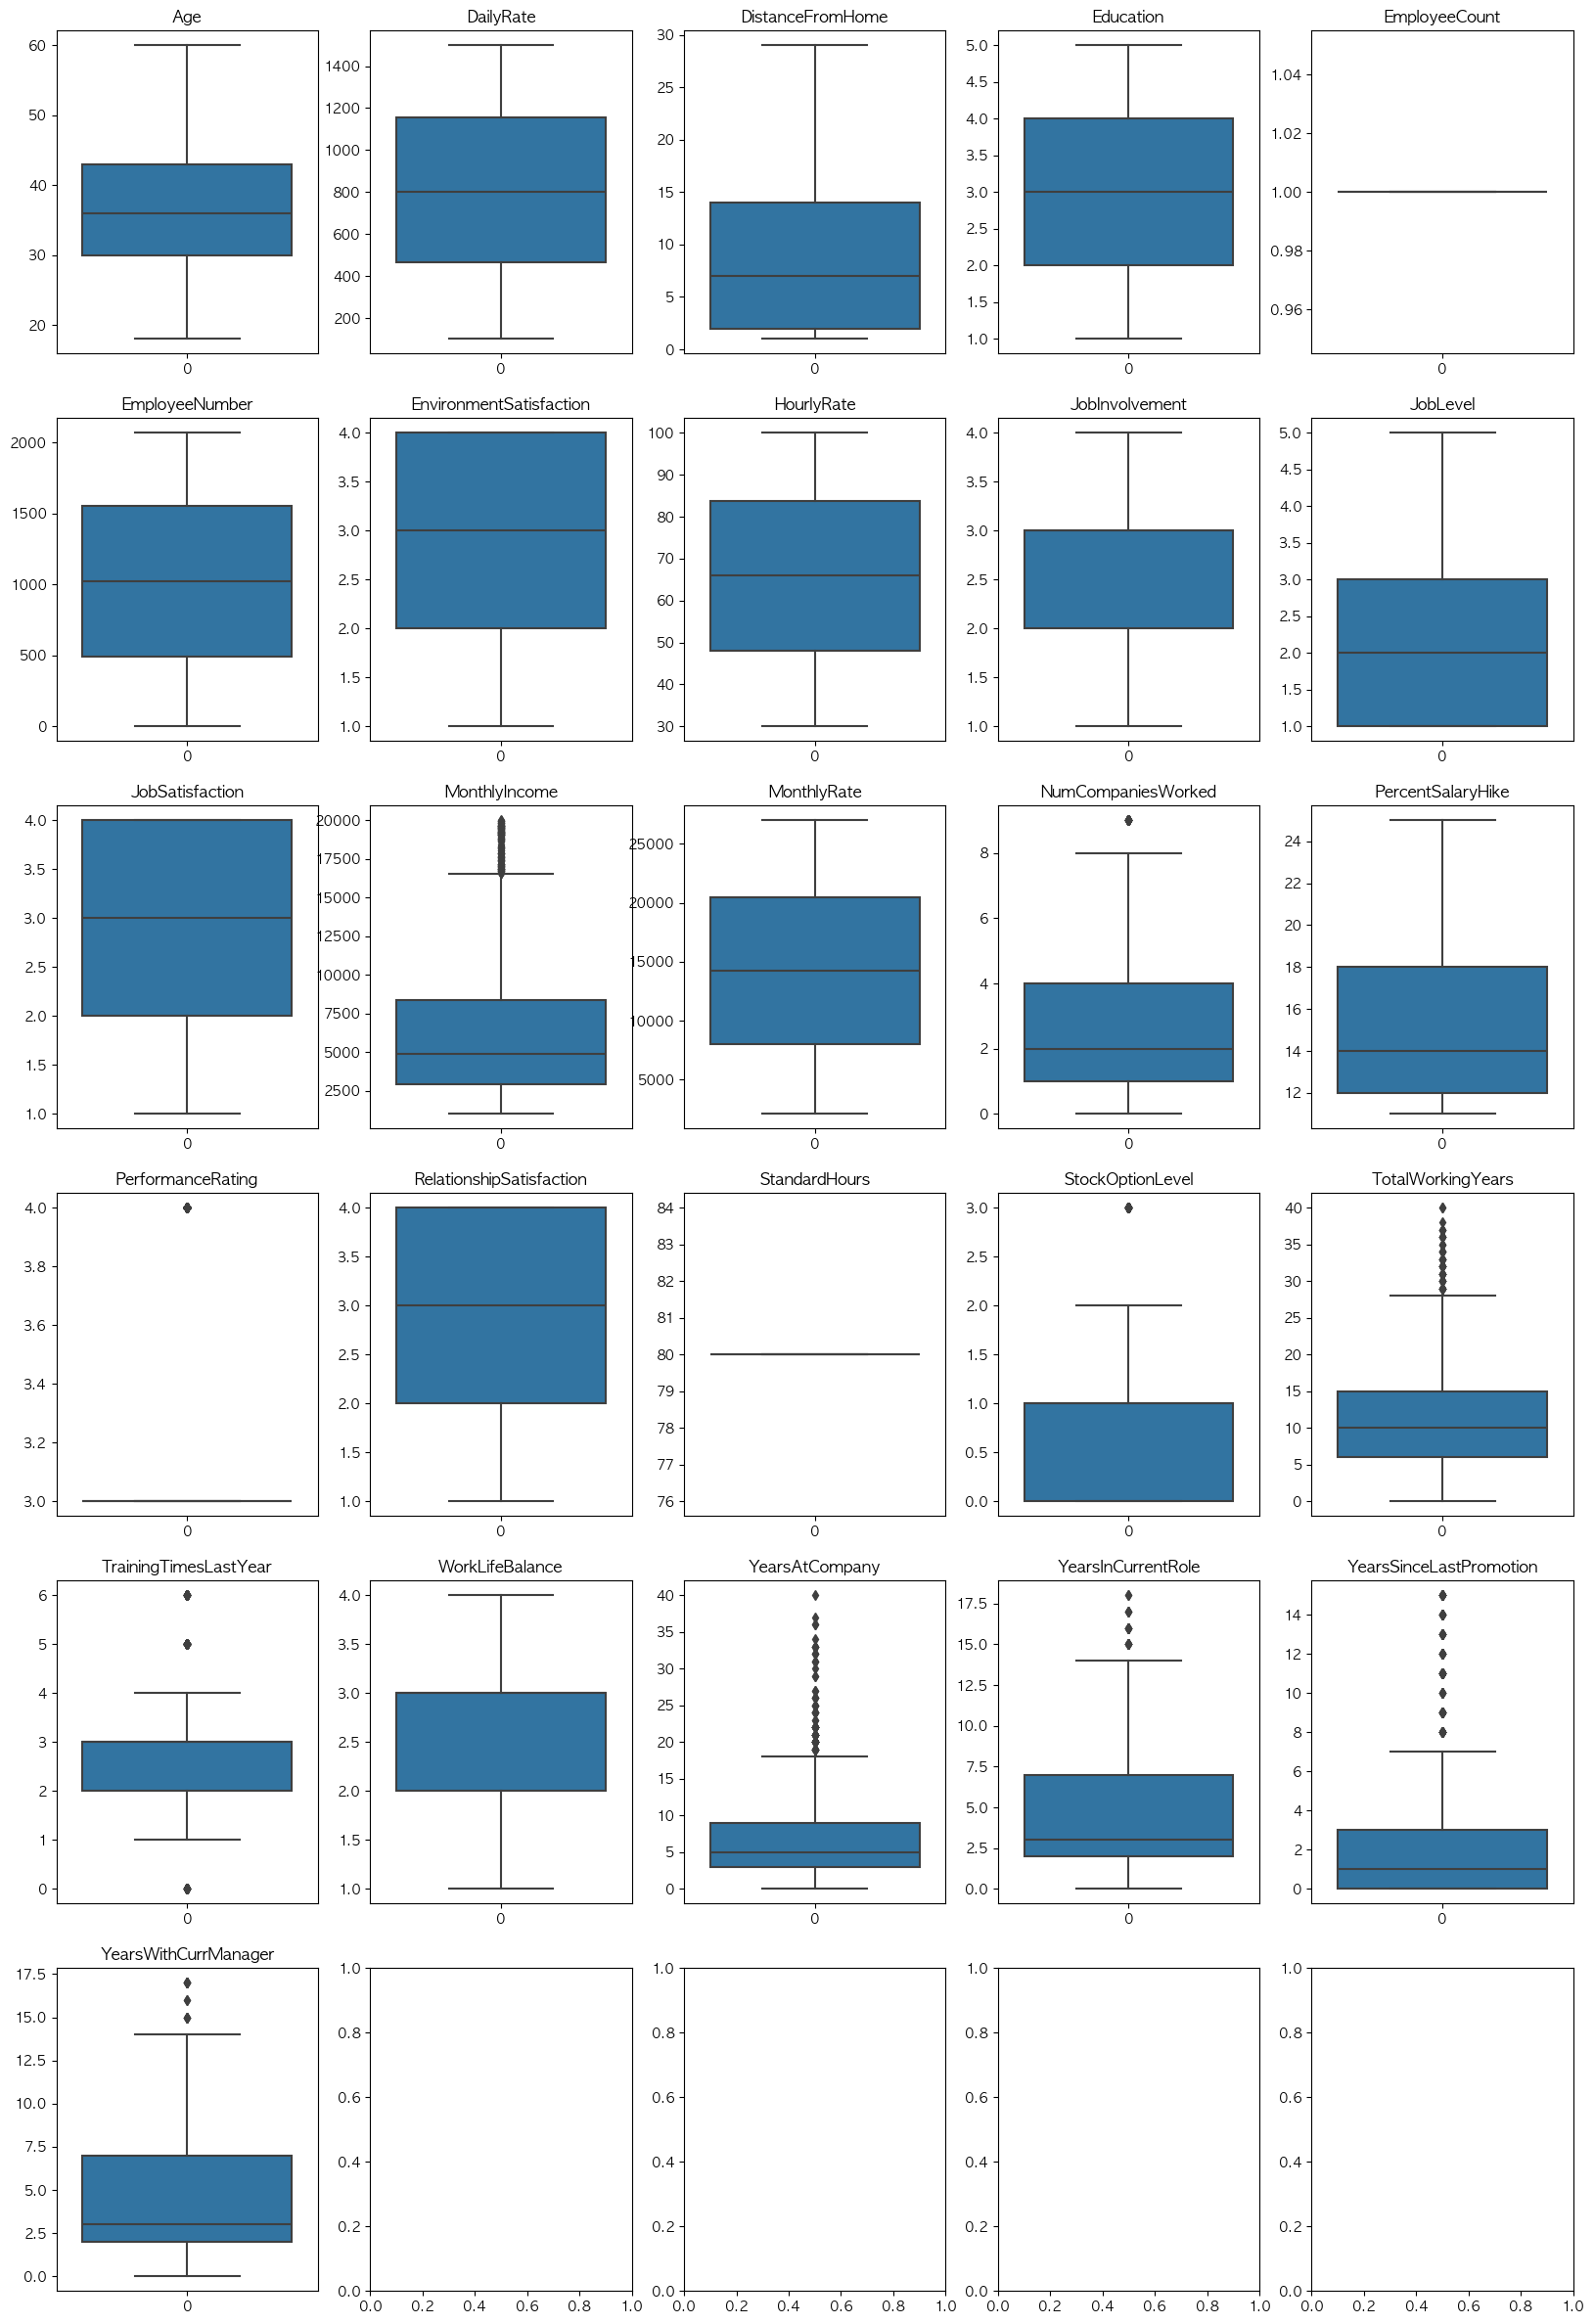

In [17]:
num_cols = data.select_dtypes(include = ['float64','int64']).columns.tolist()

col_n =5 
row_n =6

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(num_cols):
    p = sns.boxplot(data[col], ax=ax[int(i/col_n),int(i%col_n)])
    p.set_title(col)

In [23]:
# NumCompaniesWorked, StockOptionLevel, TotalWorkingYears, TrainingTimesYear, 
# YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 에서 이상치 재탐색

outliers = ['NumCompaniesWorked', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in outliers:
    print(data[col].value_counts(normalize=True))

NumCompaniesWorked
1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8    0.033333
Name: proportion, dtype: float64
StockOptionLevel
0    0.429252
1    0.405442
2    0.107483
3    0.057823
Name: proportion, dtype: float64
TotalWorkingYears
10    0.137415
6     0.085034
8     0.070068
9     0.065306
5     0.059864
7     0.055102
1     0.055102
4     0.042857
12    0.032653
3     0.028571
15    0.027211
16    0.025170
11    0.024490
13    0.024490
21    0.023129
17    0.022449
2     0.021088
14    0.021088
20    0.020408
18    0.018367
19    0.014966
23    0.014966
22    0.014286
24    0.012245
25    0.009524
28    0.009524
26    0.009524
0     0.007483
29    0.006803
31    0.006122
32    0.006122
30    0.004762
33    0.004762
27    0.004762
36    0.004082
34    0.003401
37    0.002721
35    0.002041
40    0.001361
38    0.000680
Name: proportion, dtype: float64
TrainingTimesLastYear
2    0.372109
3    0.334014
4

In [27]:
data.query('TotalWorkingYears==40')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,...,4,80,1,40,3,2,40,10,15,6
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,825,...,4,80,0,40,2,3,31,15,13,8


In [30]:
data.query('YearsAtCompany==34')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
561,52,No,Travel_Rarely,621,Sales,3,4,Marketing,1,776,...,1,80,0,34,3,4,34,6,1,16


### 딱히 눈에 띄는 이상치는 없어보임